In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [7]:
#lets check if the dataset is clean

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
# we have to convert some of the columns we'll be using for this prediction
#person_education, person_home_ownership, loan_intent,previous_loan_defaults_on_file

In [12]:
#label encoding

from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()
df['educationlevel'] = encoder.fit_transform(df['person_education'])
df['home_ownership'] = encoder.fit_transform(df['person_home_ownership'])
df['loanintention'] = encoder.fit_transform(df['loan_intent'])

In [20]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,educationlevel,home_ownership,loanintention
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,4,3,4
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,3,2,1
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,3,0,3
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,1,3,3
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,4,3,3


In [22]:
#using map lets create a dictionary and assign values to the 'previous_loan_defaults_on_file' column 

map = {'No': 0, 'Yes':1}
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace(map)
df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_5840\555593286.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace(map)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,educationlevel,home_ownership,loanintention
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1,4,3,4
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0,3,2,1
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1,3,0,3
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1,1,3,3
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1,4,3,3


In [26]:
# lets check the class balance
df['loan_status'].value_counts(normalize =True)*100

loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64

** From the dataset we can see that it is highly imbalanced so accuracy can't be used to to evaluate the model it will be misleading. I'll be making use of Recall, Precisison and F1 score to evaluate the model.

In [35]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status',
       'educationlevel', 'home_ownership', 'loanintention'],
      dtype='object')

In [51]:
# dropping columns I will not be needing for this model
df = df.drop(columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent'], axis = 1)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,educationlevel,home_ownership,loanintention
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,4,3,4
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,3,2,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,3,0,3
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,1,3,3
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,4,3,3


## Time to train the model

In [53]:
df.corr()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,educationlevel,home_ownership,loanintention
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.025917,-0.021476,-0.014649,-0.039008,0.032005
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,0.061483,-0.135808,0.000331,-0.219870,0.008639
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.029231,-0.020481,-0.012034,-0.035884,0.031230
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,-0.059009,0.107714,-0.002441,-0.150243,-0.001068
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,-0.181800,0.332005,0.000336,0.130437,-0.005372
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,-0.203252,0.384880,-0.006984,0.148933,0.003269
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.022640,-0.014851,-0.014576,-0.029549,0.030912
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.183005,-0.007647,0.012498,-0.006421,0.016244
previous_loan_defaults_on_file,-0.025917,0.061483,-0.029231,-0.059009,-0.181800,-0.203252,-0.022640,-0.183005,1.000000,-0.543096,-0.002669,-0.125974,0.038469
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,-0.543096,1.000000,-0.001747,0.233842,-0.072158


** From the above result there is no good correlation so logistic regression will not work here.

In [56]:
#Split the data into X and y
#Split your X and y into test and train
#Train the model

## ** DecisionTreeClassifier

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [66]:
#splitting the data into X and Y

X = df.drop('loan_status', axis = 1)
y = df['loan_status']

In [68]:
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size = 0.7, random_state =  123) 

In [70]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [75]:
# we'll be using accuarcy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [77]:
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is {acc:.4f}%")

The accuracy is 89.3341%


In [79]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10566
           1       0.75      0.77      0.76      2935

    accuracy                           0.89     13501
   macro avg       0.84      0.85      0.84     13501
weighted avg       0.89      0.89      0.89     13501



In [81]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9807,  759],
       [ 681, 2254]], dtype=int64)

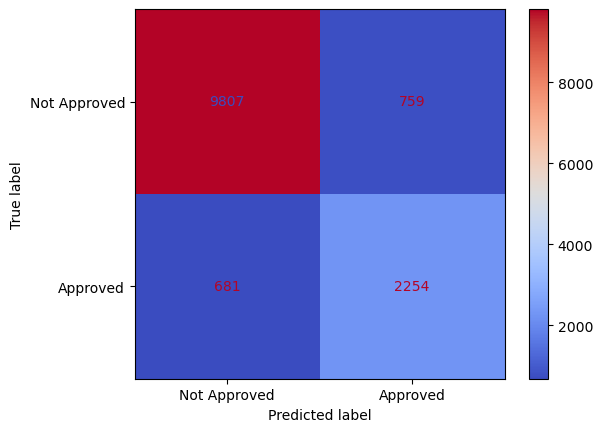

In [144]:
#CONFUSION MATRIX DISPLAYED

import matplotlib.pyplot as plt
labels = ['Not Approved', 'Approved']
display = ConfusionMatrixDisplay(cm, display_labels = labels )
display.plot(cmap = plt.cm.coolwarm)
plt.show()

### **Model Performance Summary**

The model achieved an **overall accuracy of 89%**, performing very well on the majority class (**class 0**) with a **precision and recall of 93–94%**.

Performance on the minority class (**class 1**) was moderate, with:

* **Precision**: 75%
* **Recall**: 77%
* **F1-score**: 76%

The confusion matrix shows that the model correctly identified **2,254 out of 2,935** class 1 cases, but missed **681**, and also incorrectly labeled **759** class 0 cases as class 1.

This suggests the model is **highly accurate overall**, but there's room to improve detection of class 1, especially if it represents a critical outcome.



## ** RandomForestClassifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)
randomforestpred = model.predict(X_test)

** EVALUATION

In [118]:
#Accuracy

acc2 = accuracy_score(y_test, randomforestpred)*100
print(f"The accuracy is {acc2:.4f}%")

The accuracy is 89.3341%


In [97]:
report2 = classification_report(y_test, randomforestpred)
print(report2)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10566
           1       0.75      0.77      0.76      2935

    accuracy                           0.89     13501
   macro avg       0.84      0.85      0.84     13501
weighted avg       0.89      0.89      0.89     13501



In [99]:
cm2 = confusion_matrix(y_test, randomforestpred)
cm2

array([[9807,  759],
       [ 681, 2254]], dtype=int64)

## ** SupportVector

In [120]:
from sklearn.svm import SVC

In [122]:
svrmodel = SVC()
svrmodel.fit(X_train, y_train)
svrmodelpred = svrmodel.predict(X_test)

** EVALUATION

In [124]:
#accuracy

acc3 = accuracy_score(y_test, svrmodelpred)*100
print(f"The accuracy is {acc3:.4f}%")

The accuracy is 81.0829%


In [126]:
report3 = classification_report(y_test, svrmodelpred)
print(report3)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     10566
           1       0.78      0.18      0.29      2935

    accuracy                           0.81     13501
   macro avg       0.80      0.58      0.59     13501
weighted avg       0.81      0.81      0.76     13501



In [128]:
cm3 = confusion_matrix(y_test, svrmodelpred)
cm3

array([[10421,   145],
       [ 2409,   526]], dtype=int64)

Here we can see that the accuracy is 81%. Meaning it is less than the DecisionTreeClassisfier.